# MLP Classifier Using TensorFlow for Iris Classification
Objective: Implement an MLP classifier using TensorFlow to classify the Iris dataset.
Perform data preprocessing, model building, training, and evaluation, including loss
and accuracy curves and a confusion matrix.


Epoch 1/200


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.3516 - loss: 1.2313 - val_accuracy: 0.2381 - val_loss: 1.2798
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2787 - loss: 1.2055 - val_accuracy: 0.2381 - val_loss: 1.2367
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2818 - loss: 1.2341 - val_accuracy: 0.2857 - val_loss: 1.1969
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2846 - loss: 1.1229 - val_accuracy: 0.2857 - val_loss: 1.1595
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3030 - loss: 1.1217 - val_accuracy: 0.3333 - val_loss: 1.1240
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3700 - loss: 1.0577 - val_accuracy: 0.3333 - val_loss: 1.0883
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3784 - loss: 1.0616 - val_accuracy: 0.3810 - val_loss: 1.0552
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5591 - loss: 0.9893 - val_accuracy: 0.4286 - val_loss: 1.0220
Epoch

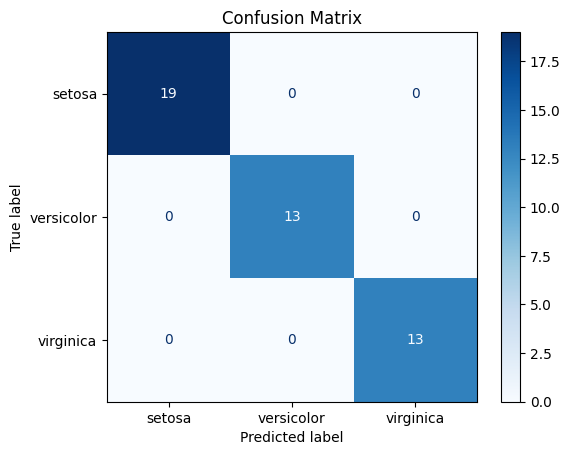

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_onehot = tf.keras.utils.to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.3, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),  
    tf.keras.layers.Dense(3, activation='softmax')  
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=200, batch_size=10, validation_split=0.2)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true_classes = np.argmax(y_test, axis=1)  


accuracy = np.mean(y_pred_classes == y_true_classes)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')


cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



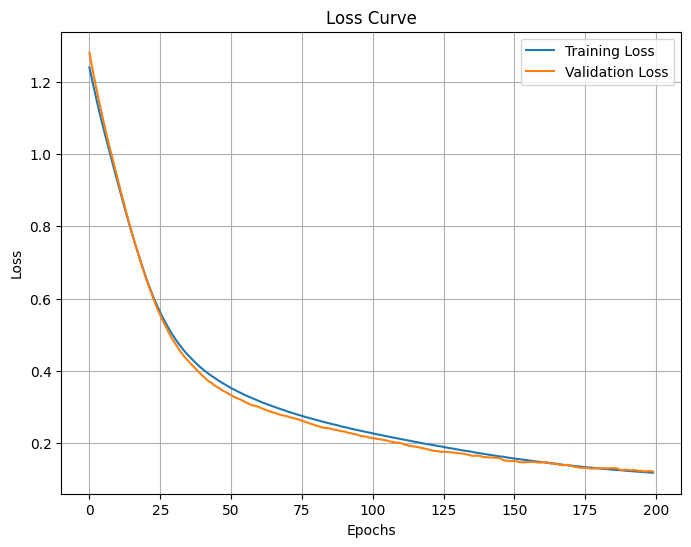

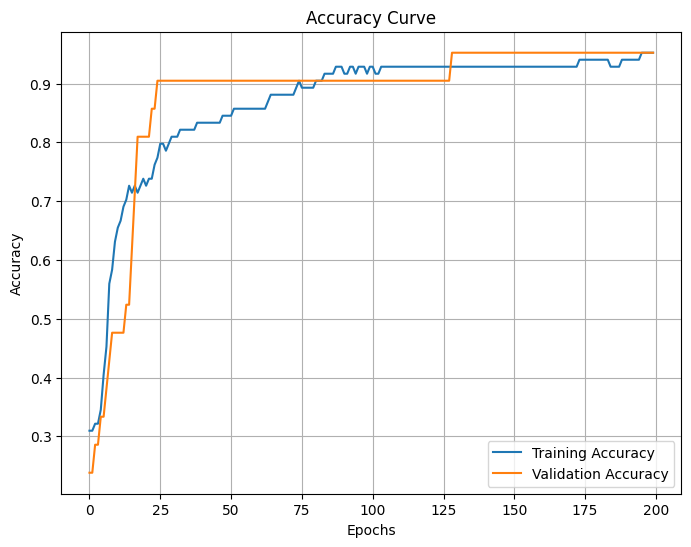

In [5]:
# Step 7: Plot loss and accuracy curves
# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


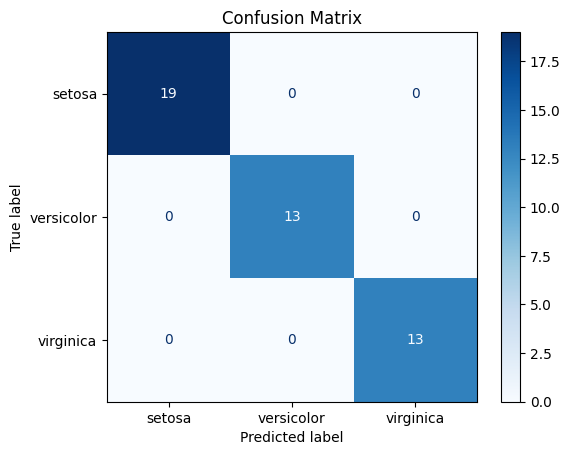

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

